In [1]:
import tensorflow as tf

In [2]:
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [3]:
# 손실곡선
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
(x_train,y_train),(x_test,y_test) =  keras.datasets.fashion_mnist.load_data()
ss = StandardScaler()

x_train_scaled =  ss.fit_transform(x_train.reshape( x_train.shape[0],-1 ))

In [5]:
x_train.shape, x_train_scaled.shape, y_train.shape
x_train,x_test,y_train,y_test =  train_test_split(x_train_scaled,y_train,random_state=32)

In [6]:
model = keras.Sequential()
# model.add(keras.layers.Flatten(input_shape=(28,28)))
# model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu',input_shape=(28*28,)))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()
          

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history =  model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1407/1407 [==============================] - 4s 2ms/step - loss: 0.4757 - accuracy: 0.8325
Epoch 2/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3672 - accuracy: 0.8730
Epoch 3/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3333 - accuracy: 0.8857
Epoch 4/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3092 - accuracy: 0.8955
Epoch 5/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2929 - accuracy: 0.9018
Epoch 6/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2772 - accuracy: 0.9081
Epoch 7/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2643 - accuracy: 0.9142
Epoch 8/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2556 - accuracy: 0.9180
Epoch 9/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2431 - accuracy: 0.9221
Epoch 10/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.244

In [8]:
history.history

{'loss': [0.4757387042045593,
  0.3672482967376709,
  0.33331891894340515,
  0.3092319965362549,
  0.2928793728351593,
  0.2771824300289154,
  0.26425081491470337,
  0.255624383687973,
  0.2430633306503296,
  0.24441787600517273],
 'accuracy': [0.8324666619300842,
  0.873022198677063,
  0.8856889009475708,
  0.8954889178276062,
  0.9017555713653564,
  0.9080888628959656,
  0.9141777753829956,
  0.9180444478988647,
  0.9221110939979553,
  0.9250888824462891]}

In [9]:
import numpy as np

In [10]:
ss = StandardScaler()
hist_loss2d =  ss.fit_transform(np.array(history.history['loss']).reshape(-1,1))
hist_accuracy2d =  ss.fit_transform(np.array(history.history['accuracy']).reshape(-1,1))

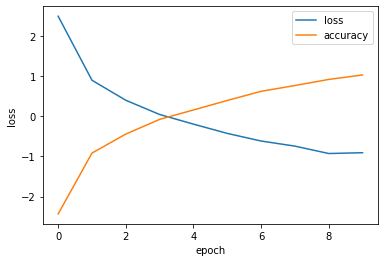

In [11]:
import matplotlib.pyplot as plt
plt.plot(hist_loss2d)
plt.plot(hist_accuracy2d)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','accuracy'])
plt.show()

In [12]:
x_test.shape

(15000, 784)

In [13]:
# epoch = 3
# 검증
model = keras.Sequential()
model.add(keras.layers.Dense(100,activation='relu',input_shape=(28*28,)))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history =  model.fit(x_train,y_train,epochs=5, validation_data=(x_test,y_test) )


Epoch 1/5
1407/1407 [==============================] - 4s 2ms/step - loss: 0.4804 - accuracy: 0.8322 - val_loss: 0.4418 - val_accuracy: 0.8486
Epoch 2/5
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3665 - accuracy: 0.8744 - val_loss: 0.4123 - val_accuracy: 0.8624
Epoch 3/5
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3305 - accuracy: 0.8878 - val_loss: 0.3919 - val_accuracy: 0.8751
Epoch 4/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3039 - accuracy: 0.8970 - val_loss: 0.4267 - val_accuracy: 0.8715
Epoch 5/5
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2880 - accuracy: 0.9033 - val_loss: 0.4067 - val_accuracy: 0.8819


In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [15]:
history.history

{'loss': [0.4804122745990753,
  0.3664972186088562,
  0.33045583963394165,
  0.30391180515289307,
  0.2880207598209381],
 'accuracy': [0.8321777582168579,
  0.8743777871131897,
  0.887844443321228,
  0.8970222473144531,
  0.9032666683197021],
 'val_loss': [0.4417515993118286,
  0.41226640343666077,
  0.391929566860199,
  0.4267260730266571,
  0.406716912984848],
 'val_accuracy': [0.8485999703407288,
  0.8623999953269958,
  0.8750666379928589,
  0.8714666962623596,
  0.881933331489563]}

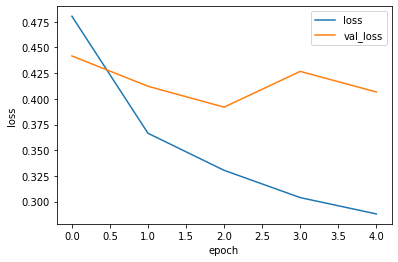

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['loss','val_loss'])
plt.show()

In [17]:
model = keras.Sequential()
model.add(keras.layers.Dense(100,activation='relu',input_shape=(28*28,)))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))
# model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# history =  model.fit(x_train,y_train,epochs=5, validation_data=(x_test,y_test) )

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history =  model.fit(x_train,y_train,epochs=20, validation_data=(x_test,y_test) )

Epoch 1/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.5847 - accuracy: 0.7970 - val_loss: 0.3897 - val_accuracy: 0.8571
Epoch 2/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4343 - accuracy: 0.8442 - val_loss: 0.3663 - val_accuracy: 0.8663
Epoch 3/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4043 - accuracy: 0.8526 - val_loss: 0.3590 - val_accuracy: 0.8704
Epoch 4/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3832 - accuracy: 0.8623 - val_loss: 0.3474 - val_accuracy: 0.8734
Epoch 5/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3664 - accuracy: 0.8660 - val_loss: 0.3395 - val_accuracy: 0.8779
Epoch 6/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3586 - accuracy: 0.8681 - val_loss: 0.3594 - val_accuracy: 0.8677
Epoch 7/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3394 - accuracy: 0.8752 - val_loss: 0.3381 - val_accuracy:

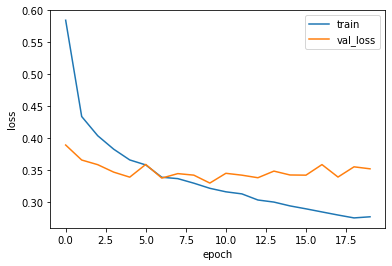

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val_loss'])
plt.show()

In [21]:
# 모델 저장 복원
model.save_weights('model-weights.h5')

In [22]:
model.save('model-whole.h5')

In [23]:
!dir/w

 E 드라이브의 볼륨: 새 볼륨
 볼륨 일련 번호: 6045-BA7D

 E:\4.numpy_workspace 디렉터리

[.]                          [..]
[.ipynb_checkpoints]         2022-08-09_넘파이.ipynb
best-model.h5                chromedriver.exe
CoffeBean.csv                [datas]
excel-comp-data.xlsx         fruits_300.npy
hollys_store.csv             model-weights.h5
model-whole.h5               [source (1)]
Untitled.ipynb               Untitled1.ipynb
wine.csv                     [wins]
데이터 시각화.ipynb          동적 웹페이지 크롤링.ipynb
동적크롤링_완성.ipynb        머신러닝I.ipynb
머신러닝II.ipynb             머신러닝III.ipynb
머신러닝IV.ipynb             머신러닝V.ipynb
머신러닝VI.ipynb             머신러닝VII.ipynb
머신러닝VIII.ipynb           선형회귀 기초.ipynb
인공지능VIIII.ipynb          전처리.ipynb
정적웹페이지 크롤링.ipynb    정적크롤링-실습.ipynb
타이타닉 데이터 노트.xlsx    통계분석.ipynb
판다스.ipynb                 판다스_20220810.ipynb
합성곱.ipynb                 
              33개 파일          23,729,499 바이트
               6개 디렉터리  145,599,021,056 바이트 남음


In [24]:
result =  model.predict(x_test)
result

469/469 [==============================] - 1s 2ms/step


array([[2.5168619e-08, 7.6126589e-09, 5.1900428e-10, ..., 2.5056694e-22,
        1.0252197e-12, 3.2353629e-21],
       [3.4919126e-16, 1.0000000e+00, 6.5452786e-19, ..., 2.0928518e-33,
        2.5837896e-22, 0.0000000e+00],
       [1.0310041e-34, 0.0000000e+00, 0.0000000e+00, ..., 1.2865531e-12,
        5.9430491e-28, 9.9999475e-01],
       ...,
       [1.9405297e-05, 2.7711375e-10, 5.1953715e-01, ..., 4.7827003e-22,
        2.6152766e-10, 3.4669780e-18],
       [4.7276760e-04, 4.2999712e-08, 9.5114487e-01, ..., 8.3916598e-13,
        6.1069358e-08, 2.8678882e-14],
       [2.8722247e-06, 4.3066123e-17, 9.0728054e-07, ..., 8.3611243e-12,
        9.9998188e-01, 5.6438036e-21]], dtype=float32)

In [25]:
np.argmax(result[0]), y_test[0]

(3, 3)

In [26]:
result.shape

(15000, 10)

In [27]:
predict_result = np.argmax(result, axis=1)
predict_result.shape, y_test.shape

((15000,), (15000,))

In [28]:
np.mean(predict_result == y_test)

0.8825333333333333

In [29]:
(_,_),(valx_test,valy_test ) =  keras.datasets.fashion_mnist.load_data()

In [30]:
predic_val = model.predict( valx_test.reshape(valx_test.shape[0],-1))

313/313 [==============================] - 0s 1ms/step


In [31]:
np.mean( np.argmax(predic_val,axis=1) == valy_test)

0.7642

In [32]:
ss =StandardScaler()
valx_test_scaled = ss.fit_transform(valx_test.reshape(valx_test.shape[0],-1))
predic_val_scaled = model.predict( valx_test_scaled)
np.mean( np.argmax(predic_val_scaled,axis=1) == valy_test)

313/313 [==============================] - 0s 947us/step


0.8782

In [45]:
# 데이터 다시 생성
from sklearn.model_selection import train_test_split
# 데이터 로드
(x_train,y_train),(x_test,y_test) =  keras.datasets.fashion_mnist.load_data()
print(x_train.shape ,y_train.shape, x_test.shape,y_test.shape)

x_train_s,x_test_s,y_train_s,y_test_s =  train_test_split(x_train,y_train,random_state=42)
print(x_train_s.shape, y_train_s.shape, x_test_s.shape, y_test_s.shape)

ss=StandardScaler()  # sklenarn 2차원을입력으로...
x_train_scaled = ss.fit_transform(x_train_s.reshape(x_train_s.shape[0],-1))
x_text_scaled = ss.fit_transform(x_test_s.reshape(x_test_s.shape[0],-1))

x_train_scaled.shape, y_train_s.shape, x_text_scaled.shape, y_test_s.shape

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(45000, 28, 28) (45000,) (15000, 28, 28) (15000,)


((45000, 784), (45000,), (15000, 784), (15000,))

In [ ]:
# callback
model = keras.Sequential()
model.add(keras.layers.Dense(100,activation='relu',input_shape=(28*28,)))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')
checkpoint =  keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)
model.fit(x_train_scaled,y_train_s,epochs=30,validation_data=(x_text_scaled,y_test_s), callbacks=checkpoint)



Epoch 1/30
1407/1407 [==============================] - 4s 3ms/step - loss: 0.5915 - accuracy: 0.7985 - val_loss: 0.4027 - val_accuracy: 0.8558
Epoch 2/30
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4405 - accuracy: 0.8420 - val_loss: 0.3820 - val_accuracy: 0.8583
Epoch 3/30
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4045 - accuracy: 0.8529 - val_loss: 0.3661 - val_accuracy: 0.8668
Epoch 4/30
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3770 - accuracy: 0.8634 - val_loss: 0.3673 - val_accuracy: 0.8677
Epoch 5/30
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3646 - accuracy: 0.8673 - val_loss: 0.3527 - val_accuracy: 0.8762
Epoch 6/30
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3533 - accuracy: 0.8700 - val_loss: 0.3542 - val_accuracy: 0.8738
Epoch 7/30
 396/1407 [=======>......................] - ETA: 1s - loss: 0.3419 - accuracy: 0.8741

In [ ]:
tempx =  ss.fit_transform(x_test.reshape(x_test.shape[0],-1))
model.evaluate(tempx,y_test)

In [ ]:
tempx.shape, y_test.shape

In [ ]:
best_model =  keras.models.load_model('best-model.h5')
best_model.summary()

In [ ]:
best_model.evaluate(tempx,y_test)

In [ ]:
# 조기종료...
model = keras.Sequential()
model.add(keras.layers.Dense(100,activation='relu',input_shape=(28*28,)))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')
checkpoint =  keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)
earlyStopping = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history =  model.fit(x_train_scaled,y_train_s,epochs=100,validation_data=(x_text_scaled,y_test_s)
          , callbacks=[checkpoint,earlyStopping])

In [ ]:
earlyStopping.stopped_epoch

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','val_loss'])
plt.show()

In [ ]:
model.evaluate(tempx,y_test)